In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
pip install --upgrade tensorflow keras numpy pandas sklearn pillow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)
Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)
Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.3)
Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)
Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)
Requirement already up-to-date: pillow in /usr/local/lib/python3.7/dist-packages (8.2.0)


In [3]:
TrainingImagePath='/content/gdrive/MyDrive/project1/archive/AFDB_face_dataset/AFDB_face_dataset'
 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
 

test_datagen = ImageDataGenerator()
 
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        color_mode="grayscale")
 
 
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        color_mode="grayscale")
 
# Printing class labels for each face
test_set.class_indices


Found 23138 images belonging to 120 classes.
Found 23138 images belonging to 120 classes.


{'aidai': 0,
 'anhu': 1,
 'axin': 2,
 'baibaihe': 3,
 'baijingting': 4,
 'baike': 5,
 'baobeier': 6,
 'baojianfeng': 7,
 'benxi': 8,
 'caiguoqing': 9,
 'caihancen': 10,
 'caiyilin': 11,
 'caizhuoyan': 12,
 'caobingkun': 13,
 'caoying': 14,
 'caoyunjin': 15,
 'cengyongti': 16,
 'changshilei': 17,
 'changyuan': 18,
 'chenbailin': 19,
 'chenderong': 20,
 'chendouling': 21,
 'chenfarong': 22,
 'chenglong': 23,
 'chenguanxi': 24,
 'chenhaomin': 25,
 'chenhe': 26,
 'chenhuilin': 27,
 'chenhuixian': 28,
 'chenjiaqi': 29,
 'chenkun': 30,
 'chenlong': 31,
 'chenqiaoen': 32,
 'chenshu': 33,
 'chenweiting': 34,
 'chenxiang': 35,
 'chenxinyu': 36,
 'chenxuedong': 37,
 'chenyao': 38,
 'chenyi': 39,
 'chenyixun': 40,
 'chenyufan': 41,
 'chenzhipeng': 42,
 'daipeini': 43,
 'dazhangwei': 44,
 'dengchao': 45,
 'denglun': 46,
 'dengziqi': 47,
 'dilireba': 48,
 'dingding': 49,
 'ditianlin': 50,
 'dongchengpeng': 51,
 'dongjie': 52,
 'dongxuan': 53,
 'duhaitao': 54,
 'dujiang': 55,
 'duwenze': 56,
 'fanbi

In [4]:
'''############ Creating lookup table for all faces ############'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'aidai', 1: 'anhu', 2: 'axin', 3: 'baibaihe', 4: 'baijingting', 5: 'baike', 6: 'baobeier', 7: 'baojianfeng', 8: 'benxi', 9: 'caiguoqing', 10: 'caihancen', 11: 'caiyilin', 12: 'caizhuoyan', 13: 'caobingkun', 14: 'caoying', 15: 'caoyunjin', 16: 'cengyongti', 17: 'changshilei', 18: 'changyuan', 19: 'chenbailin', 20: 'chenderong', 21: 'chendouling', 22: 'chenfarong', 23: 'chenglong', 24: 'chenguanxi', 25: 'chenhaomin', 26: 'chenhe', 27: 'chenhuilin', 28: 'chenhuixian', 29: 'chenjiaqi', 30: 'chenkun', 31: 'chenlong', 32: 'chenqiaoen', 33: 'chenshu', 34: 'chenweiting', 35: 'chenxiang', 36: 'chenxinyu', 37: 'chenxuedong', 38: 'chenyao', 39: 'chenyi', 40: 'chenyixun', 41: 'chenyufan', 42: 'chenzhipeng', 43: 'daipeini', 44: 'dazhangwei', 45: 'dengchao', 46: 'denglun', 47: 'dengziqi', 48: 'dilireba', 49: 'dingding', 50: 'ditianlin', 51: 'dongchengpeng', 52: 'dongjie', 53: 'dongxuan', 54: 'duhaitao', 55: 'dujiang', 56: 'duwenze', 57: 'fanbingbing', 58: 'fanganna', 5

In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

 
'''Initializing the Convolutional Neural Network'''
model= Sequential()
 
''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
model.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(64,64,1), activation='relu',padding='same'))
 
'''# STEP--2 MAX Pooling'''
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
model.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu',padding='same'))
 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Convolution2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu',padding='same'))
 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Convolution2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu',padding='same'))
 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
 
 
'''# STEP--3 FLattening'''
model.add(Flatten())
 
'''# STEP--4 Fully Connected Neural Network'''
model.add(Dense(128, activation='relu'))
 
model.add(Dense(OutputNeurons, activation='softmax'))


 
'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
Opt = Adam(lr = 0.0001)
model.compile(optimizer = Opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

###############################

###########################################################
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Starting the model training
history = model.fit_generator(
                    training_set,
                    steps_per_epoch= 723,
                    epochs=300,
                    validation_data=test_set,
                    validation_steps=500


                    )
EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
723/723 [==============================] - 10893s 15s/step - loss: 4.9439 - accuracy: 0.0111 - val_loss: 5.2749 - val_accuracy: 0.0126
Epoch 2/300
723/723 [==============================] - 69s 96ms/step - loss: 4.6898 - accuracy: 0.0230 - val_loss: 4.8711 - val_accuracy: 0.0164
Epoch 3/300
723/723 [==============================] - 72s 99ms/step - loss: 4.5392 - accuracy: 0.0367 - val_loss: 4.9461 - val_accuracy: 0.0213
Epoch 4/300
723/723 [==============================] - 69s 95ms/step - loss: 4.3831 - accuracy: 0.0525 - val_loss: 4.6369 - val_accuracy: 0.0378
Epoch 5/300
723/723 [==============================] - 69s 95ms/step - loss: 4.2051 - accuracy: 0.0759 - val_loss: 4.4831 - val_accuracy: 0.0518
Epoch 6/300
723/723 [==============================] - 69s 95ms/step - loss: 4.0521 - accuracy: 0.1010 - val_loss: 4.2835 - val_accuracy: 0.0696
Epoch 7/300
723/723 [==============================] - 69s 95ms/step - loss: 3.8927 - accuracy: 0.1297 - val_loss: 4.0866 - val_

In [6]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


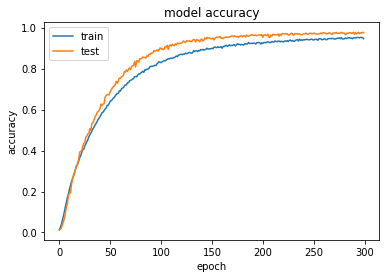

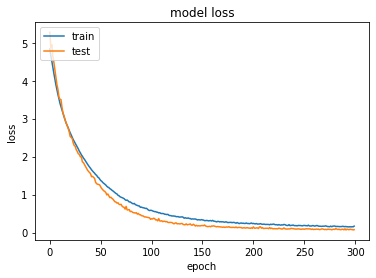

In [8]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()